In [1]:
from openenergyid.pvsim.pvlib import PVLibSimulator, PVLibPVWattsModelChain

In [2]:
simulation_parameters = {
    "system": {  # PV System, consisting of one or more PV arrays and inverters
        "arrays": [  # Arrays, consisting of mounts and modules. Default module is 420Wp.
            {
                "mount": {  # Mount, defined by tilt and azimuth
                    "surface_tilt": 35.0,  # 0 is flat, 90 is vertical
                    "surface_azimuth": 240.0,  # 0/360 is north, 180 is south
                },
                "modules_per_string": 6,
            }
        ],
        "inverter_parameters": {
            "pdc0": 2500.0  # Max Power output in Watts
        },
    },
    "location": {"latitude": 51.2, "longitude": 4.4, "tz": "Europe/Brussels"},
    "start": "2024-01-01",
    "end": "2025-01-01",
}

In [3]:
mc = PVLibPVWattsModelChain.model_validate(simulation_parameters)

In [4]:
sim = PVLibSimulator.from_pydantic(mc)

In [5]:
sim.simulation_results

timestamp
2024-01-01 00:00:00+01:00    0.0
2024-01-01 00:15:00+01:00    0.0
2024-01-01 00:30:00+01:00    0.0
2024-01-01 00:45:00+01:00    0.0
2024-01-01 01:00:00+01:00    0.0
                            ... 
2024-12-31 22:45:00+01:00    0.0
2024-12-31 23:00:00+01:00    0.0
2024-12-31 23:15:00+01:00    0.0
2024-12-31 23:30:00+01:00    0.0
2024-12-31 23:45:00+01:00    0.0
Length: 35136, dtype: float64

<Axes: xlabel='timestamp', ylabel='kWh/15min'>

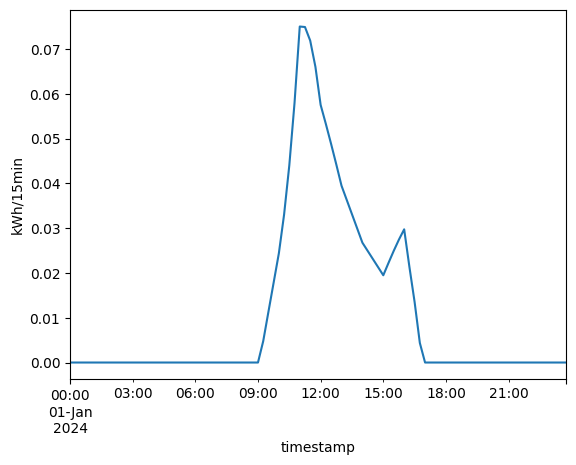

In [6]:
sim.simulation_results.iloc[0:96].plot(ylabel="kWh/15min")

<Axes: xlabel='timestamp', ylabel='kWh'>

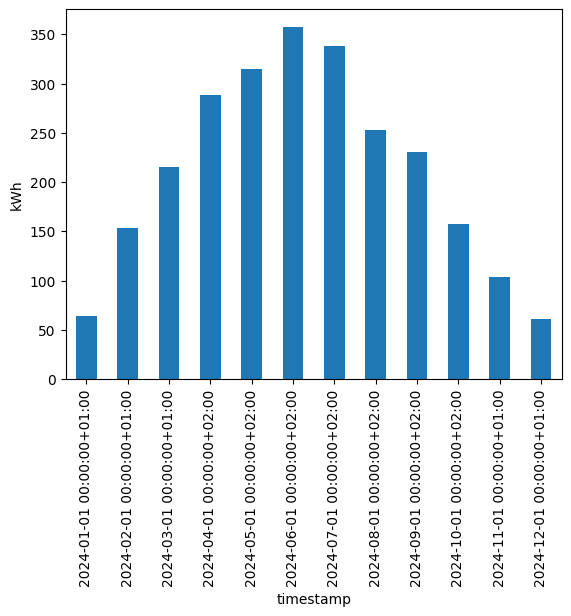

In [7]:
sim.simulation_results.resample("MS").sum().plot.bar(ylabel="kWh")